As usual, we download the standard packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import string

from collections import Counter
from sklearn import linear_model, preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Downloading the EMNIST data

The EMNIST data can be downloaded from `pytorch` as follows.  The initial download is 562 MB, so it may take a little while.  On Google colab, it will be in less than a minute.

In [2]:
train_df = pd.read_csv('./data/EMNIST/emnist-byclass-train.csv', header=None)
test_df = pd.read_csv('./data/EMNIST/emnist-byclass-test.csv', header=None)

In [3]:
'''
target_size = 697932

# Extract training set (already correct size)
ytr = train_df.iloc[:, 0].values[:target_size]
Xtr = train_df.iloc[:, 1:].values[:target_size]

# Extract and repeat test set to reach 697932
Xts_raw = test_df.iloc[:, 1:].values
yts_raw = test_df.iloc[:, 0].values

Xts = np.tile(Xts_raw, (target_size // len(Xts_raw) + 1, 1))[:target_size]
yts = np.tile(yts_raw, target_size // len(yts_raw) + 1)[:target_size]
'''

# Combine train and test sets
full_df = pd.concat([train_df, test_df], ignore_index=True)

# Load the EMNIST label mapping (integer to ASCII)
mapping_df = pd.read_csv('./data/EMNIST/emnist-byclass-mapping.txt', sep=' ', header=None, names=['index', 'ascii'])
int_to_char = {row['index']: chr(row['ascii']) for _, row in mapping_df.iterrows()}

# Extract numeric labels and map to characters
full_df.columns = ['label'] + [f'pixel{i}' for i in range(784)]
full_df['char_label'] = full_df['label'].map(int_to_char)

# Group by character labels and sample 100 per class
balanced_df = full_df.groupby('char_label').apply(lambda x: x.sample(n=500, random_state=42)).reset_index(drop=True)

/var/folders/bp/k3kx8znx5kz6y45zh5gv4gkc0000gn/T/ipykernel_8905/3702434200.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = full_df.groupby('char_label').apply(lambda x: x.sample(n=500, random_state=42)).reset_index(drop=True)


In [4]:
'''
# Basic stats
ntr = Xtr.shape[0]
nts = Xts.shape[0]

print(f"Number of training samples: {ntr}")
print(f"Number of test samples: {nts}")
'''

# Separate features and labels
X = balanced_df[[f'pixel{i}' for i in range(784)]].values
y = balanced_df['char_label'].values

# Encode string labels to numeric for sklearn
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into train/test
Xtr, Xts, ytr, yts = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Check stats
print(f"Training samples: {Xtr.shape[0]}")
print(f"Test samples: {Xts.shape[0]}")

Training samples: 24800
Test samples: 6200


In [5]:
'''
# Load the EMNIST label mapping (integer to ASCII)
mapping_df = pd.read_csv('./data/EMNIST/emnist-byclass-mapping.txt', sep=' ', header=None, names=['index', 'ascii'])
int_to_char = {row['index']: chr(row['ascii']) for _, row in mapping_df.iterrows()}

# Map numeric labels to characters
combined_labels = np.concatenate((ytr, yts))
char_labels = np.array([int_to_char[label] for label in combined_labels])

# Get unique classes
classes = np.unique(char_labels)
print("Classes:", list(classes))

nclasses = len(classes)
print(f"Total number of classes: {nclasses}")
'''

# Get class names
classes = le.classes_
print("Classes:", list(classes))
print(f"Total number of classes: {len(classes)}")

Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Total number of classes: 62


## Displaying the Characters

We will use the function from the demo to plot the characters.  Note that the `label` argument takes either `None` or a string, not a decimal.

In [6]:
def plt_digit(x,label=None):
    nrow = 28
    ncol = 28
    xsq = x.reshape((nrow,ncol))
    plt.imshow(xsq.T,  cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    if label:
        plt.title(label)

Plotting all the lower case characters:

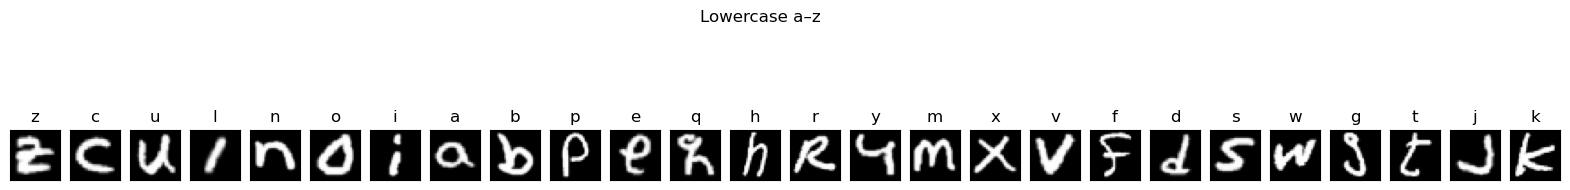

In [7]:
# Plot 26 lowercase letters
plt.figure(figsize=(20, 3))
lowercase = list(string.ascii_lowercase)
plotted = 0
seen = set()

for i in range(len(Xtr)):
    label_char = classes[ytr[i]]
    if label_char in lowercase and label_char not in seen:
        plt.subplot(1, 26, plotted + 1)
        plt_digit(Xtr[i], label=label_char)
        seen.add(label_char)
        plotted += 1
    if plotted == 26:
        break

plt.suptitle("Lowercase a–z")
plt.show()

Plotting all the uppercase characters:

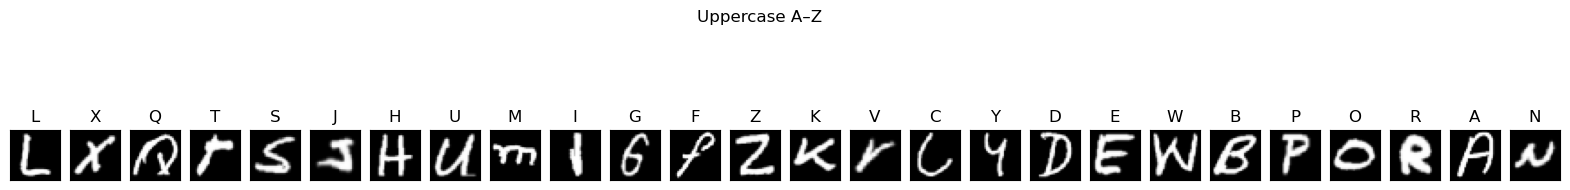

In [8]:
# Plot 26 uppercase letters
plt.figure(figsize=(20, 3))
uppercase = list(string.ascii_uppercase)
plotted = 0
seen = set()

for i in range(len(Xtr)):
    label_char = classes[ytr[i]]
    if label_char in uppercase and label_char not in seen:
        plt.subplot(1, 26, plotted + 1)
        plt_digit(Xtr[i], label=label_char)
        seen.add(label_char)
        plotted += 1
    if plotted == 26:
        break

plt.suptitle("Uppercase A–Z")
plt.show()

Plotting all the digits:

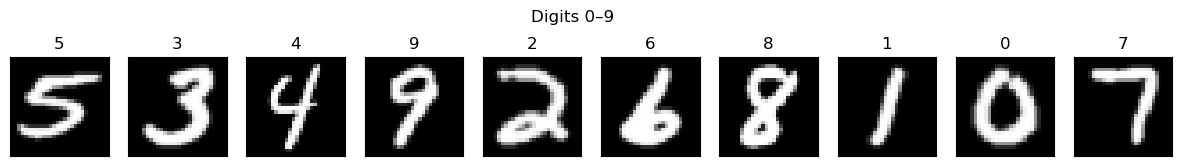

In [9]:
# Plot 10 digits
plt.figure(figsize=(15, 2))
digits = list("0123456789")
plotted = 0
seen = set()

for i in range(len(Xtr)):
    label_char = classes[ytr[i]]
    if label_char in digits and label_char not in seen:
        plt.subplot(1, 10, plotted + 1)
        plt_digit(Xtr[i], label=label_char)
        seen.add(label_char)
        plotted += 1
    if plotted == 10:
        break

plt.suptitle("Digits 0–9")
plt.show()

Headers of the EMNIST Dataset

In [10]:
# Flatten EMNIST images (28x28 to 784) and convert labels to characters
emnist_images = Xtr.reshape(Xtr.shape[0], -1)
emnist_labels = [classes[y] for y in ytr]

# Create EMNIST DataFrame
emnist_df = pd.DataFrame(emnist_images, columns=[f'pixel{i}' for i in range(784)])
emnist_df.insert(0, "label", emnist_labels)
emnist_df.insert(1, "source", "emnist")

# Show the first few rows (headers)
emnist_df.head()

,label,source,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,emnist,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,L,emnist,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,X,emnist,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,emnist,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,emnist,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Headers of the Greek Letters Dataset

In [11]:
# Load and display Greek letters CSV
greek_df = pd.read_csv("./data/GREEK/greek_letters_500.csv")

# Display headers
greek_df.head()

,label,filename,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,omicron,omicron_0.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,omicron,omicron_1.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,omicron,omicron_2.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,omicron,omicron_3.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,omicron,omicron_4.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Define valid Greek characters from your dataset
greek_letters = {'α', 'β', 'γ', 'δ', 'ε', 'ζ', 'η', 'θ', 'ι', 'κ',
                 'λ', 'μ', 'ν', 'ξ', 'ο', 'π', 'ρ', 'σ', 'τ', 'υ',
                 'φ', 'χ', 'ψ', 'ω'}

Headers of the Math Operations Dataset

In [13]:
# Load and display Math Operations CSV
math_df = pd.read_csv("./data/MATH/math_operations_500.csv")

# Display headers
math_df.head()

,label,filename,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,plus,plus_0.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,plus,plus_1.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,plus,plus_2.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,plus,plus_3.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,plus,plus_4.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Define valid Math characters from your dataset
math_chars = {'+', '-', '*', '⋅', '÷', '∫'}

In [15]:
# Example: assuming greek_df has ['label', 'pixel0', ..., 'pixel783']
# and emnist_df has same structure

# Add source tag to distinguish origin
emnist_df['source'] = 'emnist'
greek_df['source'] = 'greek'
math_df['source'] = 'math'

# Combine both datasets
combined_df = pd.concat([emnist_df, greek_df, math_df], ignore_index=True)

combined_df.head()

,label,source,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,filename
0,5,emnist,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,L,emnist,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,X,emnist,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,3,emnist,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,4,emnist,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [16]:
# Categorize each label
def categorize_label(label):
    if str(label).isdigit():
        return 'digit'
    elif str(label).isupper():
        return 'uppercase'
    elif str(label).islower():
        return 'lowercase'
    elif label in greek_letters:
        return 'greek'
    elif label in math_chars:
        return 'math'
    else:
        return 'unknown'

combined_df['type'] = combined_df['label'].apply(categorize_label)

In [17]:
X = combined_df[[f'pixel{i}' for i in range(784)]].values
y = combined_df['type'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
# Features and labels
X = combined_df[[f'pixel{i}' for i in range(784)]].values
y = combined_df['label'].values

# Encode labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

In [20]:
# Initialize and train
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [21]:
# Predictions
y_pred = rf_model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.7022900763358778

Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.42      0.36        80
           1       0.35      0.51      0.41        80
           2       0.47      0.55      0.51        80
           3       0.59      0.72      0.65        80
           4       0.47      0.71      0.56        80
           5       0.48      0.72      0.57        80
           6       0.58      0.76      0.66        80
           7       0.67      0.85      0.75        80
           8       0.48      0.59      0.53        80
           9       0.46      0.56      0.51        80
           A       0.61      0.64      0.62        80
           B       0.53      0.59      0.56        80
           C       0.41      0.59      0.48        80
           D       0.59      0.57      0.58        80
           E       0.59      0.60      0.60        80
           F       0.44      0.53      0.48        80
           G       0.59    

In [22]:
# Convert back to string labels from encoded predictions
y_pred_str = le.inverse_transform(y_pred)
y_test_str = le.inverse_transform(y_test)

# Show label distribution
print("Label frequencies in y_test_str:")
print(Counter(y_test_str))

# Define groups
digits = [str(i) for i in range(10)]
uppercase = [chr(i) for i in range(ord('A'), ord('Z') + 1)]
lowercase = [chr(i) for i in range(ord('a'), ord('z') + 1)]
math = ['plus', 'minus', 'times', 'divide', 'integral']

# Anything else is assumed to be Greek
greek = sorted(set(y_test_str) - set(digits) - set(uppercase) - set(lowercase) - set(math))

# Helper function to print group classification report
def print_group_classification_report(y_true, y_pred, label_group, group_name):
    # Get indices belonging to this group
    indices = [i for i, label in enumerate(y_true) if label in label_group]

    # Skip empty groups
    if not indices:
        print(f"\nNo samples found for {group_name}. Skipping...\n")
        return

    y_true_group = [y_true[i] for i in indices]
    y_pred_group = [y_pred[i] for i in indices]

    acc = accuracy_score(y_true_group, y_pred_group)

    print(f"\n=== {group_name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_true_group, y_pred_group, labels=label_group, zero_division=0))


Label frequencies in y_test_str:
Counter({'zeta': 100, 'delta': 100, 'integral': 100, 'divide': 100, 'theta': 100, 'chi': 100, 'epsilon': 100, 'sigma': 100, 'xi': 100, 'alpha': 100, 'gamma': 100, 'tau': 100, 'eta': 100, 'nu': 100, 'mu': 100, 'iota': 100, 'minus': 100, 'rho': 100, 'lambda': 100, 'pi': 100, 'times': 100, 'upsilon': 100, 'phi': 100, 'psi': 100, 'plus': 100, 'omega': 100, 'omicron': 100, 'beta': 100, 'kappa': 100, 'n': 80, 'Y': 80, 'D': 80, 'i': 80, 'u': 80, 'o': 80, '8': 80, '0': 80, 'X': 80, 'R': 80, 'a': 80, 'v': 80, 'r': 80, 't': 80, 'k': 80, 'e': 80, 'd': 80, 'y': 80, '5': 80, 'w': 80, 'P': 80, 'S': 80, 'l': 80, '2': 80, 'O': 80, 'j': 80, 'C': 80, 'M': 80, 'q': 80, 'm': 80, 'g': 80, '7': 80, '1': 80, 'U': 80, 'Z': 80, 'b': 80, 'L': 80, 'z': 80, 'F': 80, 'h': 80, 'J': 80, 's': 80, 'E': 80, 'T': 80, '9': 80, 'G': 80, '6': 80, 'V': 80, 'Q': 80, '3': 80, 'f': 80, 'B': 80, 'p': 80, 'x': 80, 'I': 80, 'A': 80, 'H': 80, 'N': 80, '4': 80, 'W': 80, 'K': 80, 'c': 80})


In [23]:
print_group_classification_report(y_test_str, y_pred_str, digits, "Digits")


=== Digits ===
Accuracy: 0.6412
              precision    recall  f1-score   support

           0       0.85      0.42      0.57        80
           1       0.93      0.51      0.66        80
           2       0.94      0.55      0.69        80
           3       0.89      0.72      0.80        80
           4       0.93      0.71      0.81        80
           5       0.89      0.72      0.80        80
           6       1.00      0.76      0.87        80
           7       0.91      0.85      0.88        80
           8       0.84      0.59      0.69        80
           9       0.88      0.56      0.69        80

   micro avg       0.91      0.64      0.75       800
   macro avg       0.91      0.64      0.75       800
weighted avg       0.91      0.64      0.75       800



In [24]:
print_group_classification_report(y_test_str, y_pred_str, uppercase, "Uppercase Latin Letters")


=== Uppercase Latin Letters ===
Accuracy: 0.5423
              precision    recall  f1-score   support

           A       0.73      0.64      0.68        80
           B       0.84      0.59      0.69        80
           C       0.73      0.59      0.65        80
           D       0.79      0.57      0.67        80
           E       0.79      0.60      0.68        80
           F       0.71      0.53      0.60        80
           G       0.73      0.54      0.62        80
           H       0.65      0.57      0.61        80
           I       0.96      0.34      0.50        80
           J       0.83      0.55      0.66        80
           K       0.80      0.65      0.72        80
           L       0.89      0.78      0.83        80
           M       0.95      0.47      0.63        80
           N       0.76      0.64      0.69        80
           O       0.70      0.24      0.36        80
           P       0.76      0.49      0.60        80
           Q       0.87      0.

In [25]:
print_group_classification_report(y_test_str, y_pred_str, lowercase, "Lowercase Latin Letters")


=== Lowercase Latin Letters ===
Accuracy: 0.4707
              precision    recall  f1-score   support

           a       0.81      0.47      0.60        80
           b       0.85      0.76      0.80        80
           c       0.87      0.33      0.47        80
           d       0.88      0.75      0.81        80
           e       0.95      0.72      0.82        80
           f       0.79      0.38      0.51        80
           g       0.62      0.12      0.21        80
           h       0.87      0.75      0.81        80
           i       0.76      0.42      0.54        80
           j       0.93      0.62      0.75        80
           k       0.74      0.33      0.45        80
           l       0.67      0.40      0.50        80
           m       0.87      0.51      0.65        80
           n       0.93      0.66      0.77        80
           o       0.86      0.31      0.46        80
           p       0.81      0.44      0.57        80
           q       0.57      0.

In [26]:
print_group_classification_report(y_test_str, y_pred_str, greek, "Greek Letters")


=== Greek Letters ===
Accuracy: 1.0000
              precision    recall  f1-score   support

       alpha       1.00      1.00      1.00       100
        beta       1.00      1.00      1.00       100
         chi       1.00      1.00      1.00       100
       delta       1.00      1.00      1.00       100
     epsilon       1.00      1.00      1.00       100
         eta       1.00      1.00      1.00       100
       gamma       1.00      1.00      1.00       100
        iota       1.00      1.00      1.00       100
       kappa       1.00      1.00      1.00       100
      lambda       1.00      1.00      1.00       100
          mu       1.00      1.00      1.00       100
          nu       1.00      1.00      1.00       100
       omega       1.00      1.00      1.00       100
     omicron       1.00      1.00      1.00       100
         phi       1.00      1.00      1.00       100
          pi       1.00      1.00      1.00       100
         psi       1.00      1.00      1.

In [27]:
print_group_classification_report(y_test_str, y_pred_str, math, "Math Operations")


=== Math Operations ===
Accuracy: 1.0000
              precision    recall  f1-score   support

        plus       1.00      1.00      1.00       100
       minus       1.00      1.00      1.00       100
       times       1.00      1.00      1.00       100
      divide       1.00      1.00      1.00       100
    integral       1.00      1.00      1.00       100

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



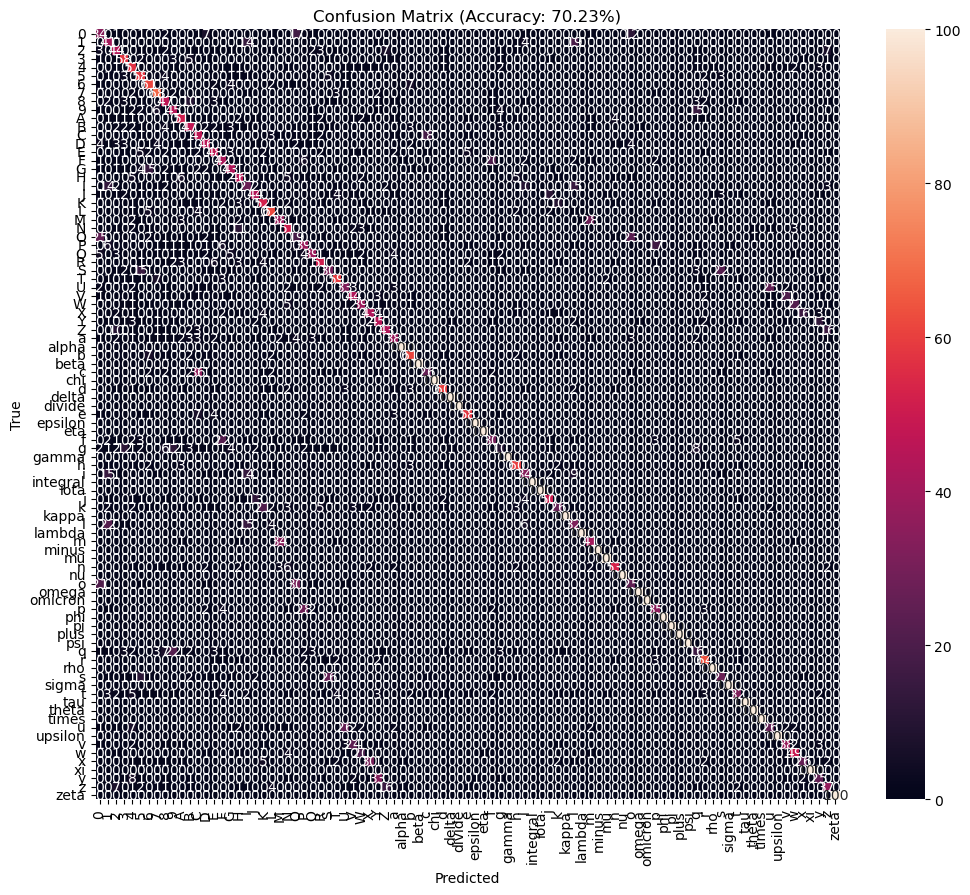

In [28]:
# Compute confusion matrix and accuracy
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100  # convert to percentage

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f}%)")
plt.show()

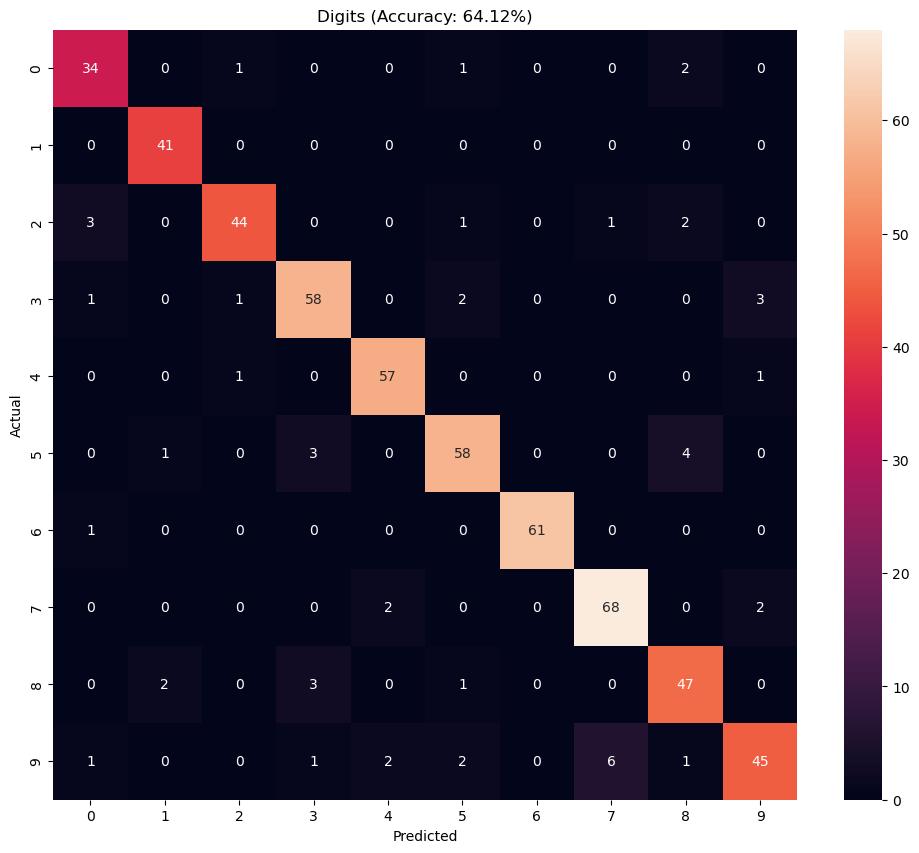

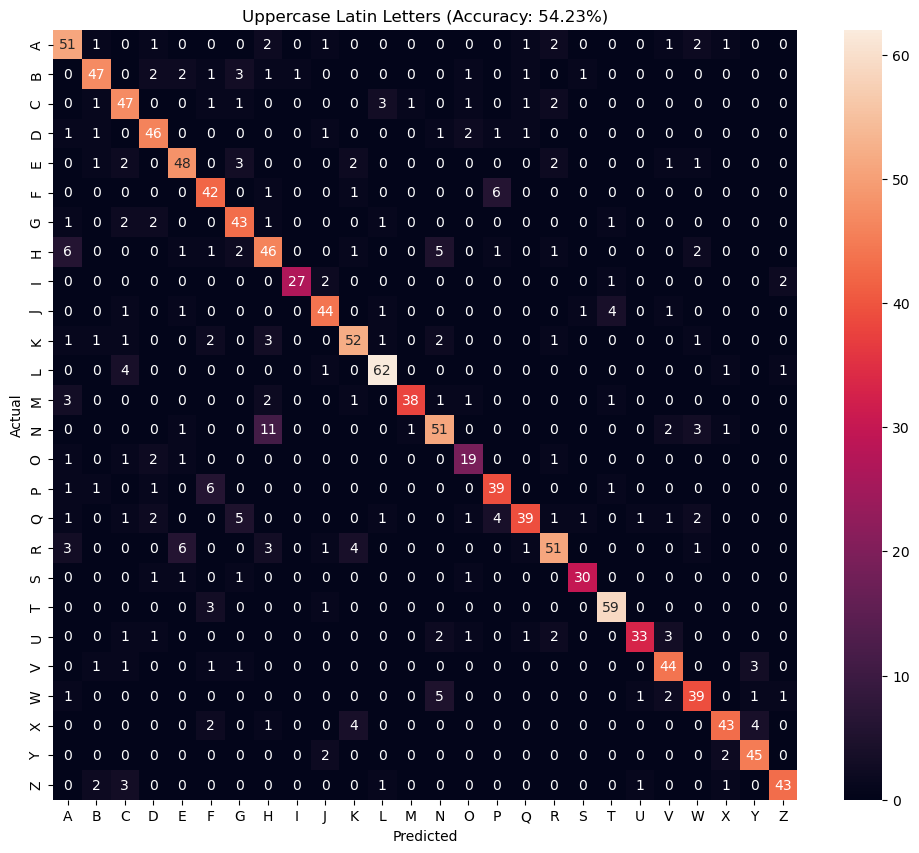

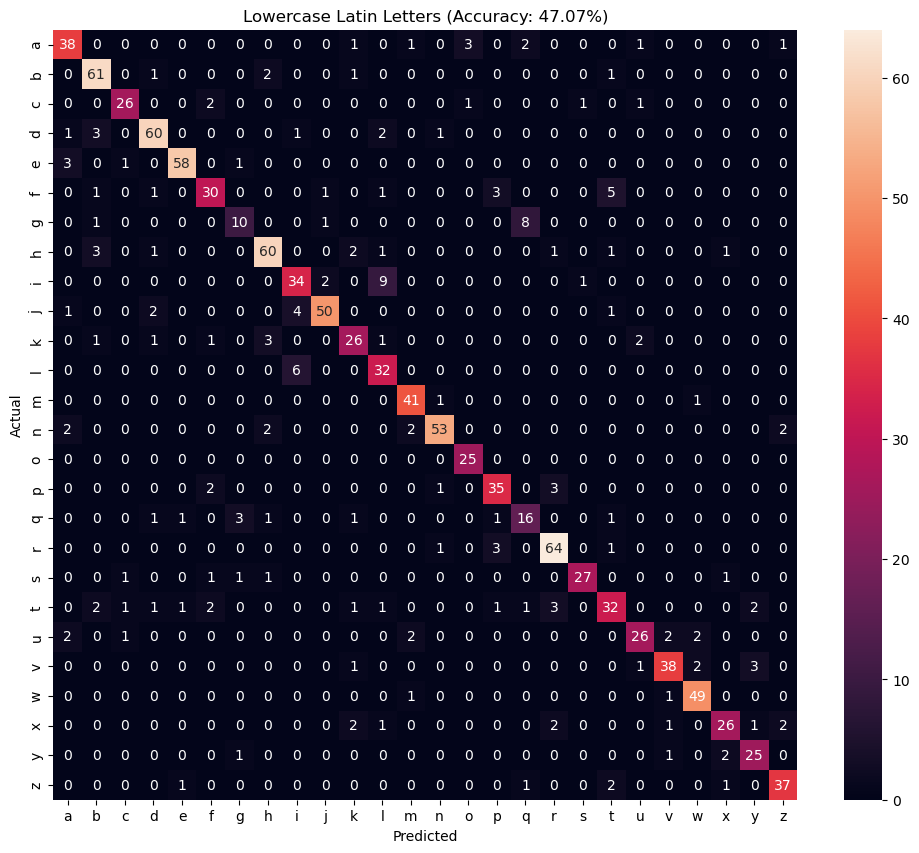

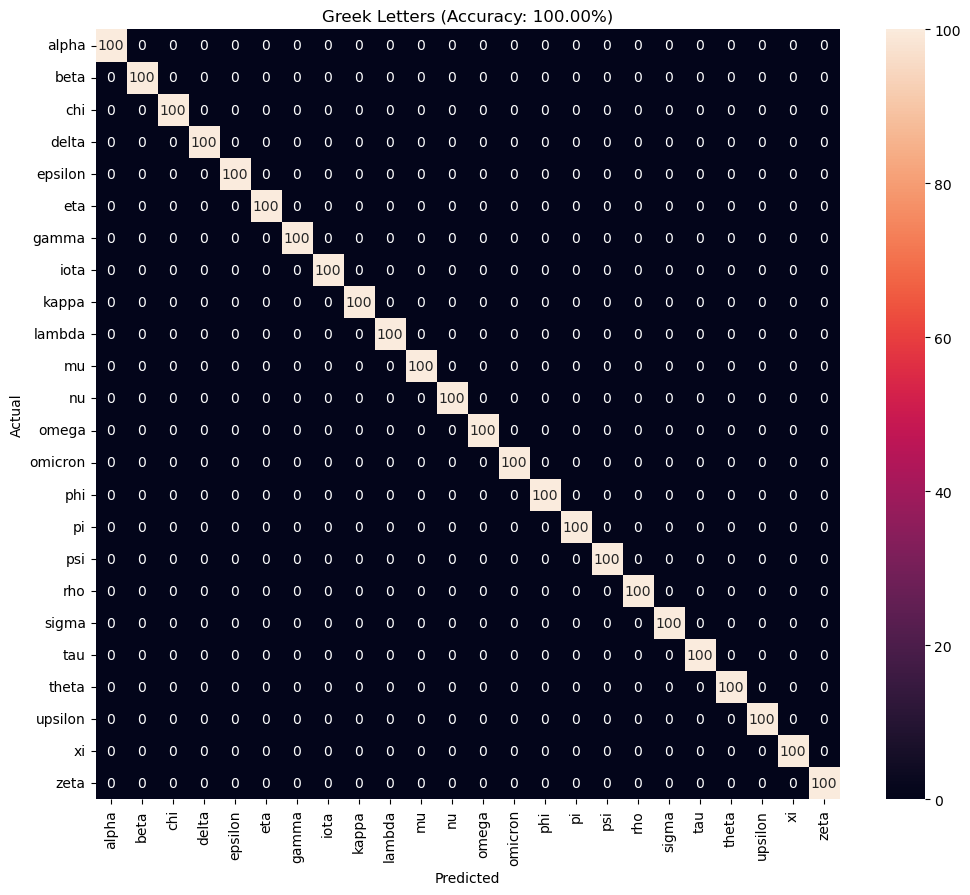

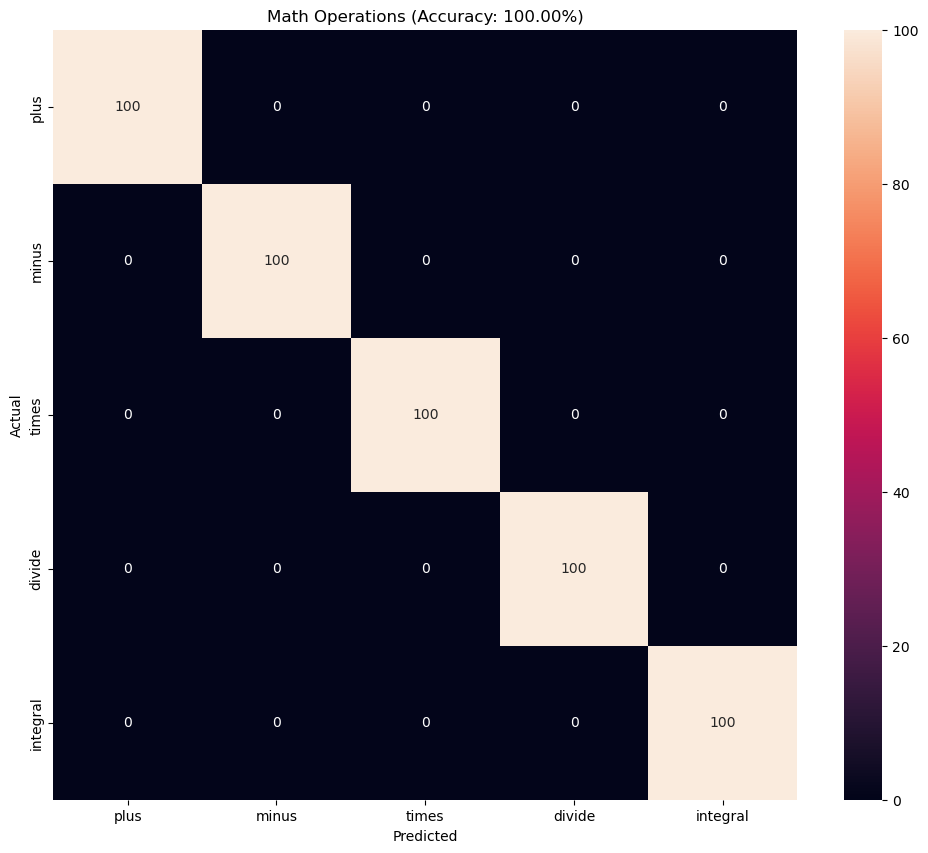

In [29]:
# Re-transform predicted and true labels to original (string) labels
y_pred_str = le.inverse_transform(y_pred)
y_test_str = le.inverse_transform(y_test)

# Create helper function
def plot_group_confusion_matrix(y_true, y_pred, label_group, group_name):
    group_indices = [i for i, label in enumerate(y_true) if label in label_group]
    y_true_group = [y_true[i] for i in group_indices]
    y_pred_group = [y_pred[i] for i in group_indices]
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true_group, y_pred_group, labels=label_group)

    # Compute accuracy
    correct = sum([1 for yt, yp in zip(y_true_group, y_pred_group) if yt == yp])
    accuracy = correct / len(y_true_group) * 100 if len(y_true_group) > 0 else 0

    # Plot
    '''
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_group, yticklabels=label_group, cmap="Blues")
    plt.title(f'{group_name} (Accuracy: {accuracy:.2f}%)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    '''

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=label_group, yticklabels=label_group)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{group_name} (Accuracy: {accuracy:.2f}%)')
    plt.show()


# Define your character groups
digits = [str(i) for i in range(10)]
uppercase = [chr(i) for i in range(ord('A'), ord('Z') + 1)]
lowercase = [chr(i) for i in range(ord('a'), ord('z') + 1)]
math = ['plus', 'minus', 'times', 'divide', 'integral']
greek = sorted(set(y_test_str) - set(digits) - set(uppercase) - set(lowercase) - set(math))

# Plot separate confusion matrices
plot_group_confusion_matrix(y_test_str, y_pred_str, digits, "Digits")
plot_group_confusion_matrix(y_test_str, y_pred_str, uppercase, "Uppercase Latin Letters")
plot_group_confusion_matrix(y_test_str, y_pred_str, lowercase, "Lowercase Latin Letters")
plot_group_confusion_matrix(y_test_str, y_pred_str, greek, "Greek Letters")
plot_group_confusion_matrix(y_test_str, y_pred_str, math, "Math Operations")


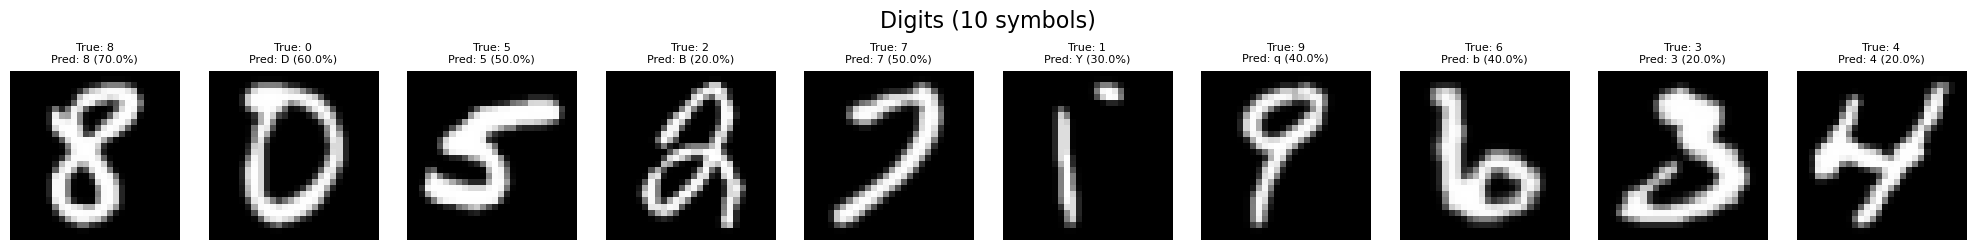

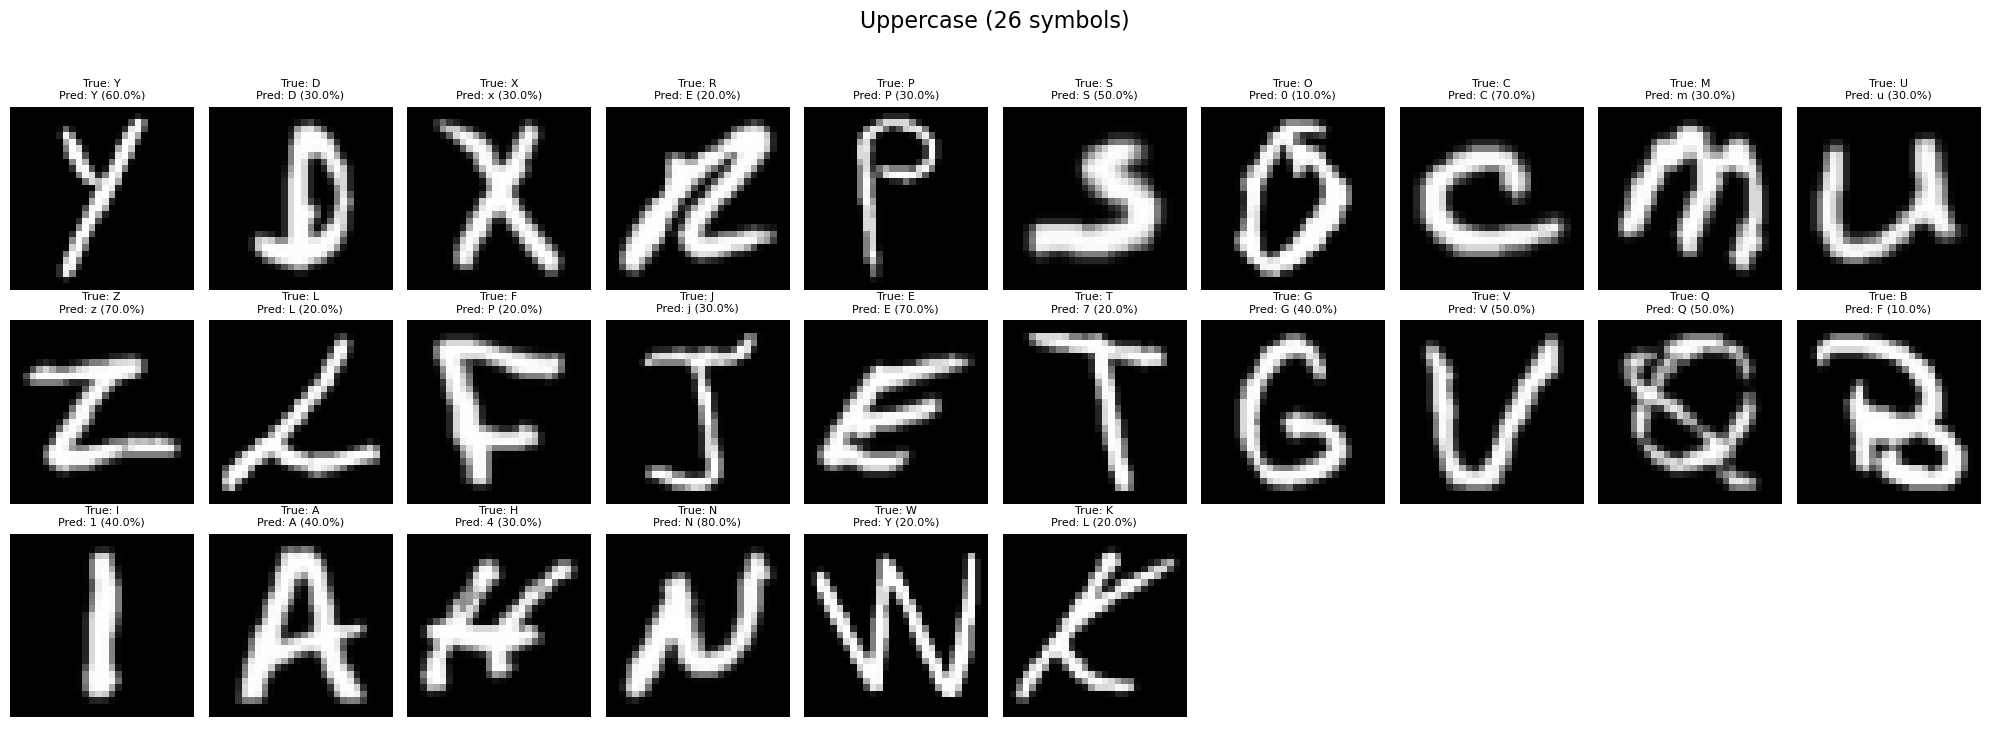

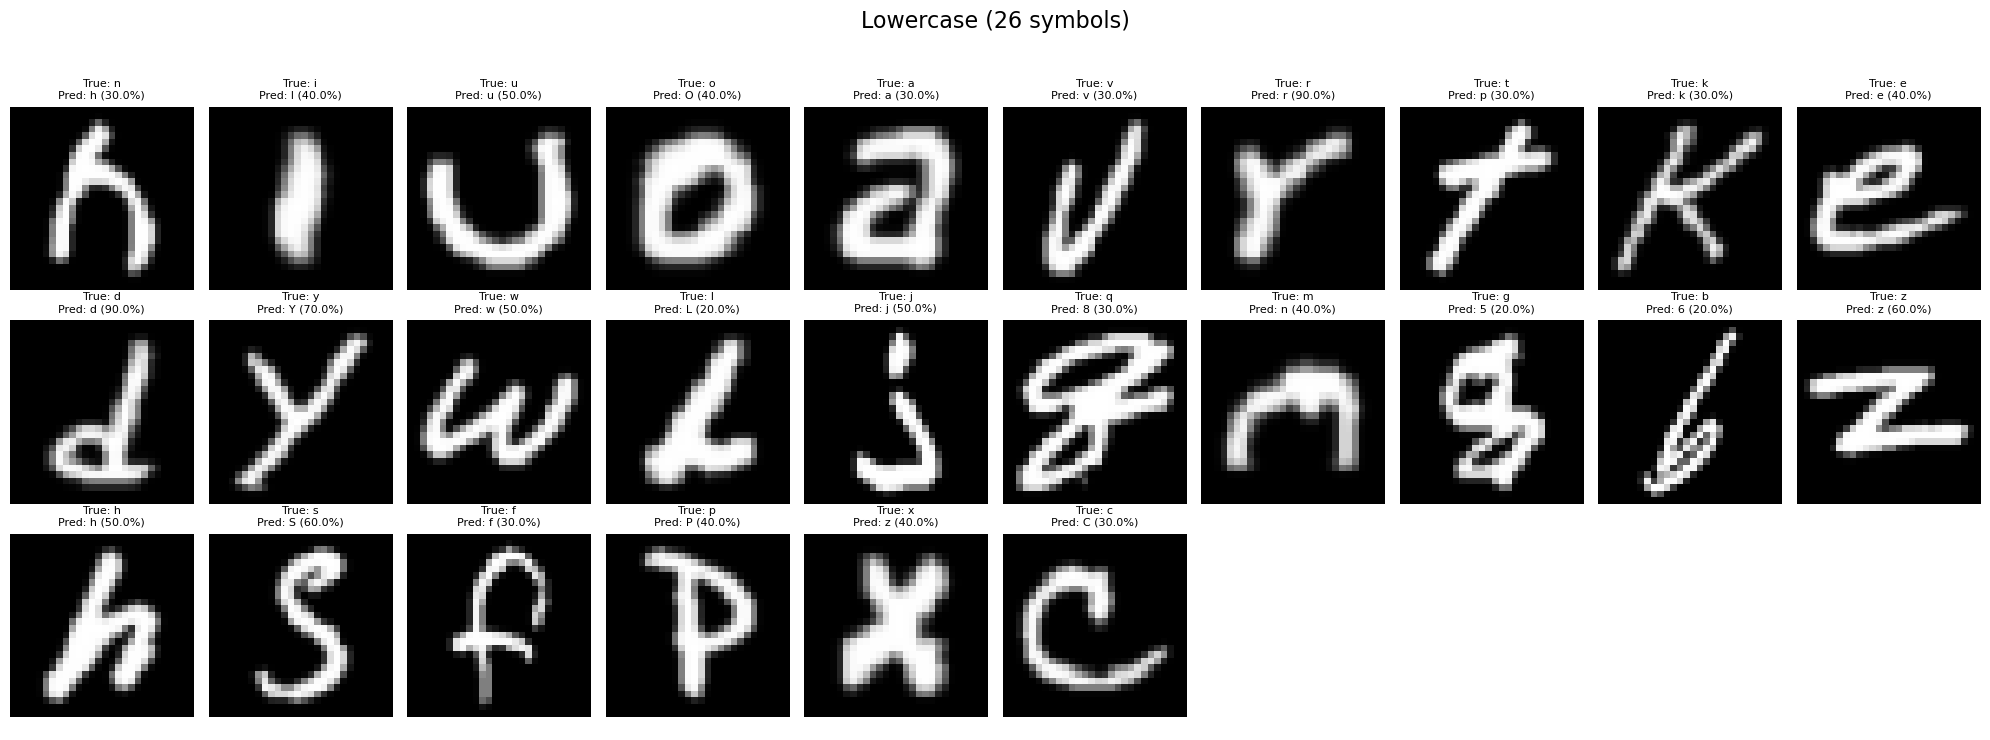

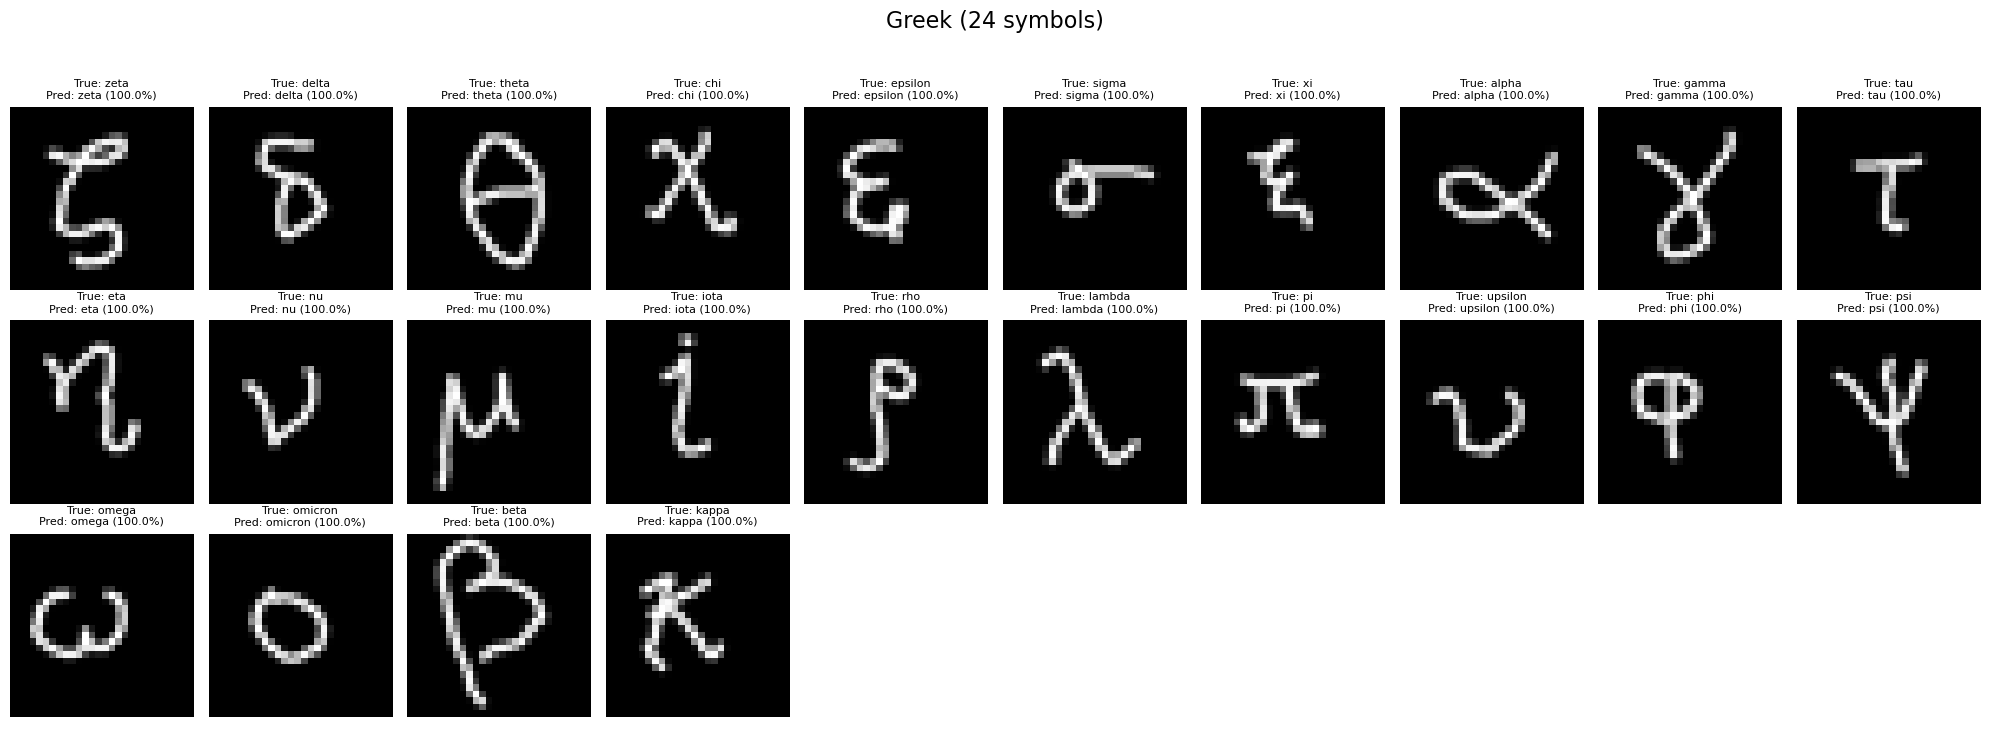

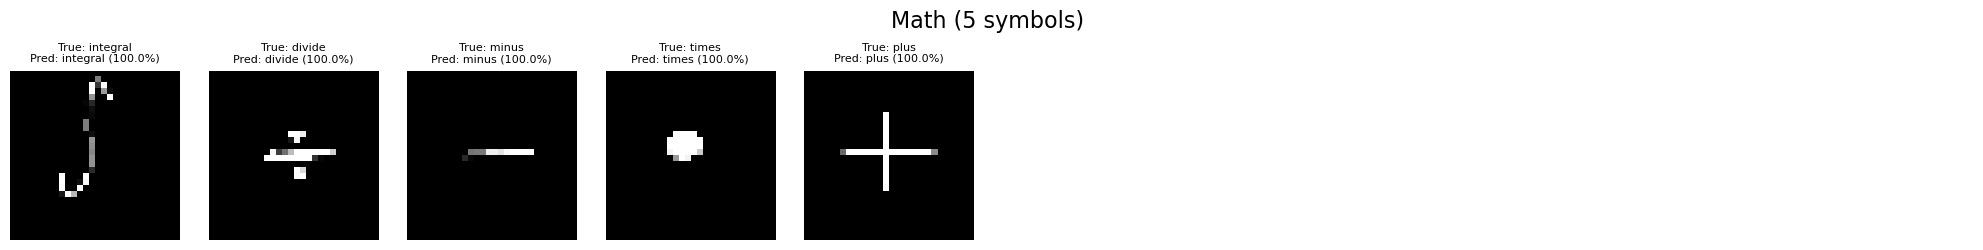

In [30]:
# Re-transform predicted and true labels to original strings
pred_labels = le.inverse_transform(y_pred)
truth_labels = le.inverse_transform(y_test)

# Get prediction confidences
probas = rf_model.predict_proba(X_test).max(axis=1) * 100

# Group definitions
digits = [str(i) for i in range(10)]
uppercase = [chr(i) for i in range(ord('A'), ord('Z') + 1)]
lowercase = [chr(i) for i in range(ord('a'), ord('z') + 1)]
math = ['plus', 'minus', 'times', 'divide', 'integral']
known = set(digits + uppercase + lowercase + math)
greek = sorted(set(truth_labels) - known)

groups = {
    "Digits": digits,
    "Uppercase": uppercase,
    "Lowercase": lowercase,
    "Greek": greek,
    "Math": math
}

# Function to get one image per symbol
def get_indices_for_all_symbols(symbols, labels):
    selected = {}
    for i, label in enumerate(labels):
        if label in symbols and label not in selected:
            selected[label] = i
        if len(selected) == len(symbols):
            break
    return list(selected.values())

# Loop through each group
for group_name, symbols in groups.items():
    indices = get_indices_for_all_symbols(symbols, truth_labels)
    if not indices:
        print(f"No samples found for {group_name}. Skipping.")
        continue

    n = len(indices)
    cols = 10
    rows = int(np.ceil(n / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(2 * cols, 2.5 * rows))
    axes = axes.flatten()

    for ax_idx, data_idx in enumerate(indices):
        ax = axes[ax_idx]

        # Reshape image
        image = X_test[data_idx].reshape(28, 28)

        # Rotate for Digits, Uppercase, Lowercase
        if group_name in ["Digits", "Uppercase", "Lowercase"]:
            image = np.rot90(image, k=1)  
            image = np.flipud(image)     

        ax.imshow(image, cmap="gray")
        ax.set_title(
            f"True: {truth_labels[data_idx]}\nPred: {pred_labels[data_idx]} ({probas[data_idx]:.1f}%)",
            fontsize=8
        )
        ax.axis('off')

    # Turn off extra axes
    for ax in axes[n:]:
        ax.axis('off')

    plt.suptitle(f"{group_name} ({n} symbols)", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()